<a href="https://colab.research.google.com/github/jnragu/ee608_exam2/blob/main/Module3_WrittenAnalysis_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Networks Written Analyis

In this project, two network datasets are analyzed to understand the behaviors and relationships between the actors in the datasets.

## Problem 2: Investigating a time-varying criminal network

This problem studies a time-varying criminal network that is repeatedly disturbed by police forces. 

The CAVIAR investigation occured from 1994 to 1996. The mandate was to seize drugs without arresting the perpetrators. During this period, imports of the trafficking network were hit by the police. 

The arrests took place only at the end of the investigation. 

Eleven seized took place in the investigations. 

| Phase | Number of Seizures | Monetary losses for traffickers |  Drugs seized | 
| --- | --- | --- | --- | 
| Phase 4 | 1 seizure | \$2,500,000 | 300 kg of marijuana | 
| Phase 6 | 3 seizures | \$1,300,000 | 2 × 15 kg of marijuana + 1 × 2 kg |  
| Phase 7 | 1 seizure | \$3,500,000 | 401 kg of marijuana |
| Phase 8 | 1 seizure | \$360,000 | 9 kg of cocaine | 
Phase 9 | 2 seizures | \$4,300,000 | 2 kg of cocaine + 1 × 500 kg marijuana |

The network consists of `110` (numbered) players. 

Players `1-82` are traffickers. Players `83-110` are non-traffickers (financial investors, accountants, owners of importation businesses).

In [3]:
import pandas as pd
import networkx as nx
phases = {}
G = {}
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  G[i] = nx.from_pandas_adjacency(phases[i])
  G[i].name = var_name

### Size of network at each phase

In [4]:
G_summaries = {'Nodes': [], 'Edges': []}
for i in range(1, 12):
  G_summaries['Nodes'].append(G[i].number_of_nodes())
  G_summaries['Edges'].append(G[i].number_of_edges())

G_summaries = pd.DataFrame(G_summaries, range(1, 12))
G_summaries

,Nodes,Edges
1,15,18
2,24,28
3,33,56
4,33,48
5,32,39
6,27,47
7,36,49
8,42,58
9,34,44
10,42,50


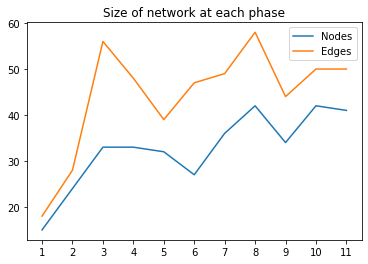

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(G_summaries['Nodes'], label = 'Nodes')
plt.plot(G_summaries['Edges'], label = 'Edges')
plt.xticks(G_summaries.index)
plt.title('Size of network at each phase')
plt.legend()
plt.show()

## Visualizing the graph at each phase

In [ ]:
! apt-get install graphviz graphviz-dev && pip install pygraphviz

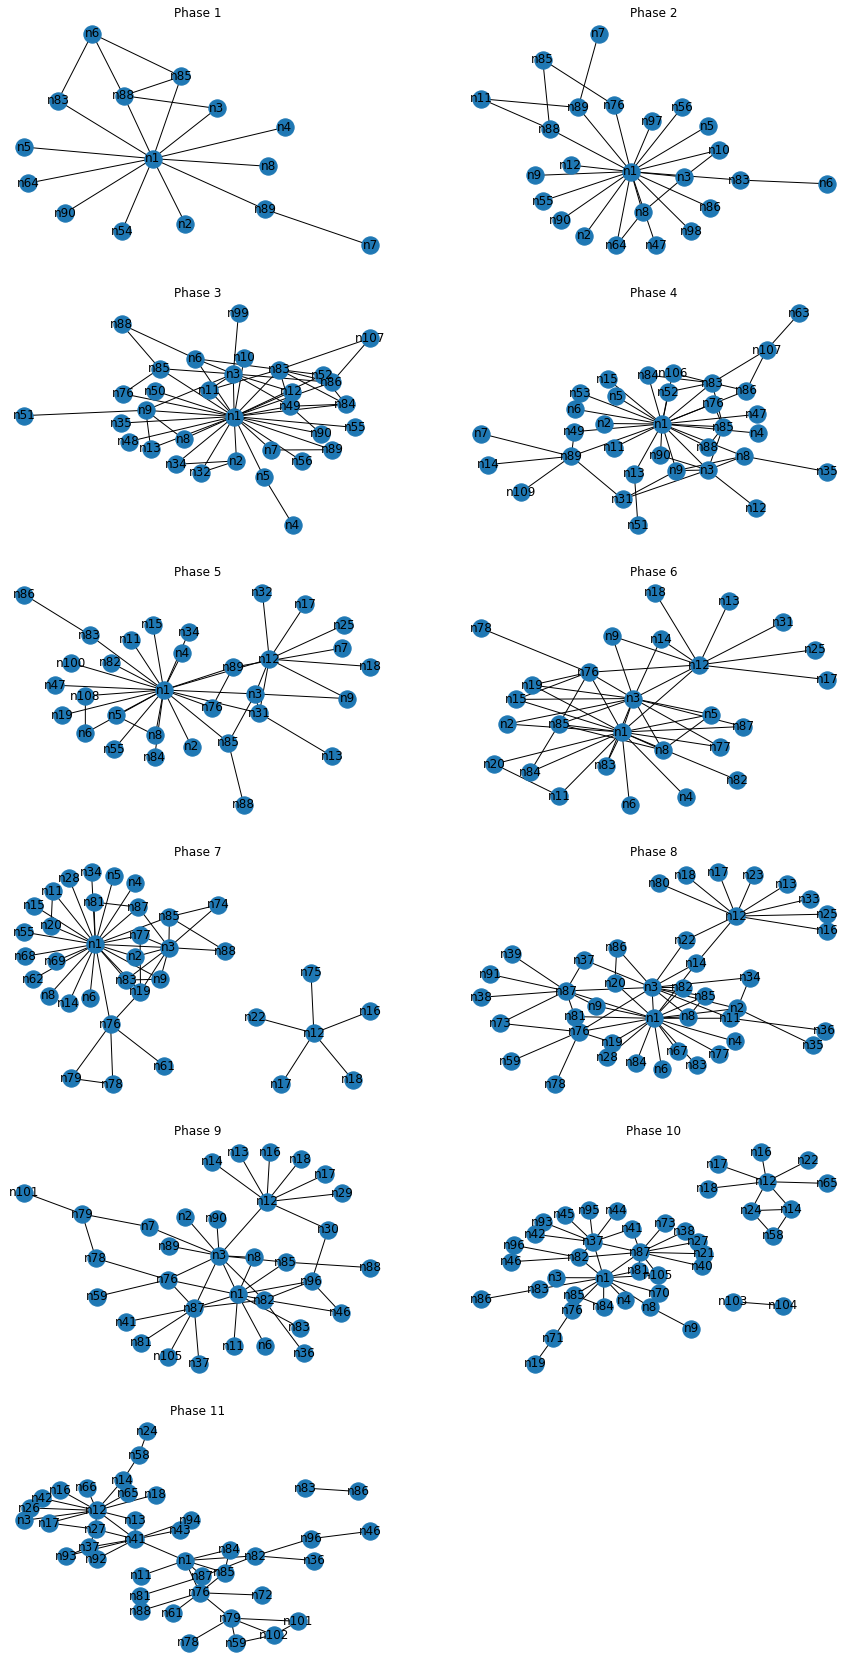

In [23]:
count = 1
plt.subplots(figsize = (15, 30))
for i in range(1, 12):
  plt.subplot(6, 2, count)
  nx.draw(G[i], pos=nx.drawing.nx_agraph.graphviz_layout(G[i]), with_labels = True)  
  plt.title(f'Phase {i}')
  count += 1 

## Degree centrality

The normalized degree centrality of node $i$ is defined as
$$
  \tilde k_i = \frac{k_i}{n-1}
$$
where $k_i$ is the degree of node $i$ and $n$ is the number of nodes in the graph. 

In [24]:
degree_centrality = []
for graph in G.values():
  degree_centrality.append(nx.degree_centrality(graph))

degree_centrality = pd.DataFrame(degree_centrality)
degree_centrality

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8,n86,n55,n10,n56,n97,n47,n98,n76,n9,n11,n12,n48,n34,n35,n32,n84,n49,n107,n50,n99,n13,n51,n52,n53,n63,...,n67,n38,n73,n39,n59,n37,n23,n33,n80,n91,n36,n96,n46,n29,n30,n105,n101,n41,n24,n58,n21,n103,n104,n27,n95,n93,n42,n71,n40,n44,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
0,0.857143,0.071429,0.142857,0.142857,0.142857,0.071429,0.285714,0.214286,0.071429,0.071429,0.071429,0.071429,0.214286,0.071429,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.826087,NaN,0.130435,0.086957,0.130435,0.043478,0.130435,0.086957,0.043478,0.043478,0.043478,NaN,0.043478,0.086957,0.130435,0.043478,0.043478,0.086957,0.043478,0.043478,0.043478,0.043478,0.086957,0.043478,0.086957,0.043478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.843750,0.031250,0.062500,0.250000,0.281250,0.062500,0.062500,0.125000,0.062500,0.093750,0.062500,NaN,0.125000,NaN,0.062500,0.125000,0.031250,0.031250,0.031250,NaN,NaN,NaN,0.062500,0.156250,0.093750,0.062500,0.03125,0.062500,0.03125,0.062500,0.125000,0.15625,0.06250,0.03125,0.03125,0.062500,0.03125,0.09375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.718750,0.031250,0.187500,0.218750,0.218750,0.031250,0.062500,0.156250,0.062500,0.031250,0.031250,NaN,0.031250,NaN,0.125000,0.093750,NaN,NaN,NaN,NaN,0.031250,NaN,0.062500,0.125000,0.031250,0.031250,NaN,NaN,0.03125,NaN,0.062500,0.06250,0.09375,NaN,NaN,0.062500,0.03125,0.06250,0.03125,0.03125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.709677,0.032258,0.096774,0.064516,0.161290,0.064516,0.032258,0.096774,NaN,0.032258,0.032258,NaN,0.064516,NaN,0.064516,0.032258,0.032258,NaN,NaN,NaN,0.032258,NaN,0.064516,0.064516,0.032258,0.258065,NaN,0.032258,NaN,0.032258,0.032258,NaN,NaN,NaN,NaN,0.032258,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.692308,0.038462,NaN,0.076923,0.538462,0.115385,NaN,0.192308,NaN,0.076923,NaN,NaN,0.038462,NaN,0.153846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269231,0.076923,0.076923,0.384615,NaN,NaN,NaN,NaN,0.076923,NaN,NaN,NaN,NaN,0.038462,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.685714,0.028571,NaN,0.085714,0.285714,0.028571,0.057143,0.114286,NaN,0.057143,NaN,NaN,0.028571,NaN,0.028571,NaN,0.028571,NaN,NaN,NaN,NaN,NaN,0.142857,0.085714,0.057143,0.142857,NaN,0.028571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.487805,0.024390,NaN,0.024390,0.317073,NaN,NaN,0.073171,NaN,0.097561,NaN,NaN,0.024390,NaN,0.073171,0.048780,NaN,NaN,NaN,NaN,NaN,NaN,0.146341,0.048780,0.073171,0.243902,NaN,0.048780,0.02439,NaN,0.024390,NaN,NaN,NaN,NaN,0.024390,NaN,NaN,NaN,NaN,...,0.02439,0.02439,0.04878,0.02439,0.024390,0.048780,0.02439,0.02439,0.02439,0.02439,0.024390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.303030,NaN,0.030303,0.030303,0.333333,NaN,0.030303,0.090909,0.030303,0.030303,0.060606,NaN,0.030303,NaN,0.060606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151515,NaN,0.030303,0.242424,NaN,NaN,

## Betweeness Centrality

For undirected graphs, the normalized betweenness centrality for node $i$ is defined as 
$$
\tilde B_i = \frac{2}{(n-1)(n-2)}\sum_{s \not = i \not = t}^{}{\frac{n^i_{st}}{g_{st}}}
$$
where $n^i_{st}$ is the number of shortest paths between $s$ and $t$ that pass through $i$
and where $g_{st}$ is the total number of shortest paths between $s$ and $t$. 

In [25]:
betweenness_centrality = []
for graph in G.values():
  betweenness_centrality.append(nx.betweenness_centrality(graph, normalized = True))

betweenness_centrality = pd.DataFrame(betweenness_centrality)
betweenness_centrality

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8,n86,n55,n10,n56,n97,n47,n98,n76,n9,n11,n12,n48,n34,n35,n32,n84,n49,n107,n50,n99,n13,n51,n52,n53,n63,...,n67,n38,n73,n39,n59,n37,n23,n33,n80,n91,n36,n96,n46,n29,n30,n105,n101,n41,n24,n58,n21,n103,n104,n27,n95,n93,n42,n71,n40,n44,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
0,0.906593,0.0,0.142857,0.036630,0.000000,0.0000,0.053114,0.036630,0.0,0.000000,0.000000,0.0,0.010989,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.942688,NaN,0.123847,0.086957,0.001976,0.0000,0.083004,0.003294,0.0,0.000000,0.000000,NaN,0.000000,0.0,0.001976,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.038208,0.000000,0.006588,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.829503,0.0,0.000000,0.046573,0.095497,0.0625,0.000672,0.029973,0.0,0.001008,0.000000,NaN,0.033333,NaN,0.000000,0.028024,0.0,0.0,0.0,NaN,NaN,NaN,0.000000,0.067540,0.000806,0.000000,0.0,0.0,0.0,0.0,0.000672,0.007527,0.0000,0.0,0.0,0.0000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.839310,0.0,0.196213,0.079589,0.090438,0.0000,0.000000,0.016537,0.0,0.000000,0.000000,NaN,0.000000,NaN,0.062500,0.047427,NaN,NaN,NaN,NaN,0.0,NaN,0.000000,0.014761,0.000000,0.000000,NaN,NaN,0.0,NaN,0.000000,0.000000,0.0625,NaN,NaN,0.0625,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.883871,0.0,0.064516,0.064516,0.044086,0.0000,0.000000,0.064516,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000,0.0,NaN,NaN,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.269892,NaN,0.0,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.542564,0.0,NaN,0.000000,0.227179,0.0000,NaN,0.010256,NaN,0.000000,NaN,NaN,0.000000,NaN,0.001026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.098462,0.000000,0.000000,0.382051,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.589356,0.0,NaN,0.000000,0.073389,0.0000,0.000000,0.031653,NaN,0.000000,NaN,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.134454,0.000000,0.000000,0.016807,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.553659,0.0,NaN,0.000000,0.314634,NaN,NaN,0.000000,NaN,0.055285,NaN,NaN,0.000000,NaN,0.000000,0.002033,NaN,NaN,NaN,NaN,NaN,NaN,0.118293,0.000000,0.048780,0.356707,NaN,0.0,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,...,0.0,0.0,0.004878,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.249053,NaN,0.000000,0.000000,0.576231,NaN,0.000000,0.060606,0.0,0.000000,0.087753,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.131944,NaN,0.000000,0.357323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.000000,NaN,NaN,NaN,NaN,0.0,0.038984,0.0,0.0,0.019886,0.0,0.0,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.342683,0.0,NaN,0.035366,0.000000,NaN,NaN,

## Eigenvector Centrality 

The eigenvector centrality takes into account a node's neighbor's connectedness. The measure is determined by the number of a node's neighbor's connections. For example, when comparing two nodes with the same number of connections, the node that has a neighbor who is more highly connected will have a higher eigenvector centrality. 

The eigenvector centrality is normalized as 
$$
\sqrt{\sum_{i}^{}{v_i^2}} = 1
$$

In [26]:
eigenvector_centrality = []
for graph in G.values():
  eigenvector_centrality.append(nx.degree_centrality(graph))

eigenvector_centrality = pd.DataFrame(eigenvector_centrality)
eigenvector_centrality

,n1,n4,n89,n83,n3,n5,n88,n85,n90,n2,n7,n54,n6,n64,n8,n86,n55,n10,n56,n97,n47,n98,n76,n9,n11,n12,n48,n34,n35,n32,n84,n49,n107,n50,n99,n13,n51,n52,n53,n63,...,n67,n38,n73,n39,n59,n37,n23,n33,n80,n91,n36,n96,n46,n29,n30,n105,n101,n41,n24,n58,n21,n103,n104,n27,n95,n93,n42,n71,n40,n44,n45,n65,n70,n43,n102,n72,n26,n94,n92,n66
0,0.857143,0.071429,0.142857,0.142857,0.142857,0.071429,0.285714,0.214286,0.071429,0.071429,0.071429,0.071429,0.214286,0.071429,0.071429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.826087,NaN,0.130435,0.086957,0.130435,0.043478,0.130435,0.086957,0.043478,0.043478,0.043478,NaN,0.043478,0.086957,0.130435,0.043478,0.043478,0.086957,0.043478,0.043478,0.043478,0.043478,0.086957,0.043478,0.086957,0.043478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.843750,0.031250,0.062500,0.250000,0.281250,0.062500,0.062500,0.125000,0.062500,0.093750,0.062500,NaN,0.125000,NaN,0.062500,0.125000,0.031250,0.031250,0.031250,NaN,NaN,NaN,0.062500,0.156250,0.093750,0.062500,0.03125,0.062500,0.03125,0.062500,0.125000,0.15625,0.06250,0.03125,0.03125,0.062500,0.03125,0.09375,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.718750,0.031250,0.187500,0.218750,0.218750,0.031250,0.062500,0.156250,0.062500,0.031250,0.031250,NaN,0.031250,NaN,0.125000,0.093750,NaN,NaN,NaN,NaN,0.031250,NaN,0.062500,0.125000,0.031250,0.031250,NaN,NaN,0.03125,NaN,0.062500,0.06250,0.09375,NaN,NaN,0.062500,0.03125,0.06250,0.03125,0.03125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.709677,0.032258,0.096774,0.064516,0.161290,0.064516,0.032258,0.096774,NaN,0.032258,0.032258,NaN,0.064516,NaN,0.064516,0.032258,0.032258,NaN,NaN,NaN,0.032258,NaN,0.064516,0.064516,0.032258,0.258065,NaN,0.032258,NaN,0.032258,0.032258,NaN,NaN,NaN,NaN,0.032258,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.692308,0.038462,NaN,0.076923,0.538462,0.115385,NaN,0.192308,NaN,0.076923,NaN,NaN,0.038462,NaN,0.153846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269231,0.076923,0.076923,0.384615,NaN,NaN,NaN,NaN,0.076923,NaN,NaN,NaN,NaN,0.038462,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.685714,0.028571,NaN,0.085714,0.285714,0.028571,0.057143,0.114286,NaN,0.057143,NaN,NaN,0.028571,NaN,0.028571,NaN,0.028571,NaN,NaN,NaN,NaN,NaN,0.142857,0.085714,0.057143,0.142857,NaN,0.028571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.487805,0.024390,NaN,0.024390,0.317073,NaN,NaN,0.073171,NaN,0.097561,NaN,NaN,0.024390,NaN,0.073171,0.048780,NaN,NaN,NaN,NaN,NaN,NaN,0.146341,0.048780,0.073171,0.243902,NaN,0.048780,0.02439,NaN,0.024390,NaN,NaN,NaN,NaN,0.024390,NaN,NaN,NaN,NaN,...,0.02439,0.02439,0.04878,0.02439,0.024390,0.048780,0.02439,0.02439,0.02439,0.02439,0.024390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.303030,NaN,0.030303,0.030303,0.333333,NaN,0.030303,0.090909,0.030303,0.030303,0.060606,NaN,0.030303,NaN,0.060606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.151515,NaN,0.030303,0.242424,NaN,NaN,

## What algorithm is the fastest for this dataset?

In [40]:
import time 

calculation_times = {'Degree Centrality': 0, 'Betweenness Centrality': 0, 'Eigenvector Centrality': 0}

start = time.time()
nx.degree_centrality(G[1])
end = time.time()
calculation_times['Degree Centrality'] = end - start
start = time.time()
nx.betweenness_centrality(G[1], normalized = True)
end = time.time()
calculation_times['Betweenness Centrality'] = end - start

start = time.time()
nx.eigenvector_centrality(G[1])
end = time.time()
calculation_times['Eigenvector Centrality'] = end - start

calculation_times

{'Betweenness Centrality': 0.0012402534484863281,
 'Degree Centrality': 8.7738037109375e-05,
 'Eigenvector Centrality': 0.0009236335754394531}

The degree centrality algorithm is the fastest for this dataset. 

Degree centrality is $\mathcal O(n^2)$ while betweeness and eigenvector centralities are $\mathcal O(n^3)$. 

## Temporal consistency of a player's centrality

To find the temporal consistency of each player, the mean centrality of each of the centrality metrics, accross all phases, for each player is calculated. 

The temporal consistency finds which players consistently remained active and central throughout most of the phases. 

In [41]:
# Replace all null values with 0 

degree_centrality = degree_centrality.fillna(0)
betweenness_centrality = betweenness_centrality.fillna(0)
eigenvector_centrality = eigenvector_centrality.fillna(0)

In [42]:
degree_centrality.mean()

n1     0.601485
n4     0.025636
n89    0.059124
n83    0.095836
n3     0.223505
         ...   
n72    0.002273
n26    0.002273
n94    0.002273
n92    0.002273
n66    0.002273
Length: 107, dtype: float64